In [ ]:
import csv

def count_commas_in_comments(row):
    comments = row['Comments']
    count = comments.count(',')
    return count

def process_csv(input_file, output_file, start_row=19):
    with open(input_file, 'r') as csvfile, open(output_file, 'w', newline='') as output_csv:
        reader = csv.DictReader(csvfile)
        writer = csv.DictWriter(output_csv, fieldnames=reader.fieldnames)
        writer.writeheader()

        # Skip initial rows until row 19
        for _ in range(start_row - 1):
            next(reader)

        for row in reader:
            comments = row['Comments']
            # Replace commas with '|' in comments
            updated_comments = comments.replace(',', '|')
            # Count commas in comments
            comma_count = count_commas_in_comments(row)
            
            # Print original comments, updated comments, and comma count
            print(f"Original Comments: {comments}")
            print(f"Updated Comments: {updated_comments}")
            print(f"Number of Commas in Comments: {comma_count}")

            # Prompt the user for confirmation
            replace = input("Do you want to replace the comments? (y/n): ").lower()
            if replace == 'y':
                # Update comments in the row
                row['Comments'] = updated_comments
            else:
                # Ask for custom string
                custom_comments = input("Enter the custom string to replace comments: ")
                row['Comments'] = custom_comments
            
            # Write the row to the output CSV file
            writer.writerow(row)
            print()

# Provide the path to your input and output CSV files
input_file = 'example.csv'
output_file = 'updated_example.csv'
process_csv(input_file, output_file)


Original Comments: 
Updated Comments: 
Number of Commas in Comments: 0

Original Comments: shame they don't show the tank afterwards,They got someone who records school fights,They got someone who records school fights,They got someone who records school fights,Bro they just show where the mine blew acting like the tank didn’t continue driving
Updated Comments: shame they don't show the tank afterwards|They got someone who records school fights|They got someone who records school fights|They got someone who records school fights|Bro they just show where the mine blew acting like the tank didn’t continue driving
Number of Commas in Comments: 4

Original Comments: The problem is that nato has been a hollow shell and leaning on the us and France since the 80’s and now they have no money or supplies to give and,Man I get it but the US People are struggling. Why can’t we help ourselves? The same countries that laugh at our military spending are demanding we give them more.,We got to start t

In [25]:
import csv

def convert_to_normal(value):
    if value is None or value.strip() == '':
        return '--'  # Fill with '--' for blank values
    elif 'k' in value.lower():
        return float(value[:-1]) * 1000
    elif 'm' in value.lower():
        return float(value[:-1]) * 1000000
    else:
        return value

def process_csv(input_file, output_file, columns_to_convert):
    with open(input_file, 'r') as csvfile, open(output_file, 'w', newline='') as output_csv:
        reader = csv.DictReader(csvfile)
        writer = csv.DictWriter(output_csv, fieldnames=reader.fieldnames)
        writer.writeheader()

        for row in reader:
            for column in columns_to_convert:
                value = row[column]
                if column == 'view_count' and (value is None or value.strip() == ''):
                    row[column] = '--'  # Fill with '--' for blank values
                elif value.isdigit() or value is None or value == '':
                    continue  # Skip if the value is already a digit or None
                else:
                    # Convert the value to normal digits
                    row[column] = convert_to_normal(value)
            writer.writerow(row)

# Provide the path to your input and output CSV files
input_file ="/Users/tahers/Documents/CN-TikTok/Tejas.csv"
output_file = 'Tejas_cleaning.csv'
columns_to_convert = ['like_count', 'comment_count', 'share_count','view_count']  # Specify the columns to convert
process_csv(input_file, output_file, columns_to_convert)


In [18]:
import csv

def format_comments(comments):
    comment_parts = comments.split(';')
    updated_comment = ''
    for i, part in enumerate(comment_parts):
        updated_comment += f"{i+1}.{part} "
    return updated_comment[:-1]

def replace_comments(input_file, output_file):
    with open(input_file, 'r') as csvfile, open(output_file, 'w', newline='') as output_csv:
        reader = csv.DictReader(csvfile)
        writer = csv.DictWriter(output_csv, fieldnames=reader.fieldnames)
        writer.writeheader()

        for row in reader:
            if 'Comments' in row and row['Comments'].strip() != '':
                comments = row['Comments']
                formatted_comment = format_comments(comments)
                row['Comments'] = formatted_comment
            writer.writerow(row)

# Provide the path to your input and output CSV files
input_file = "/Users/tahers/Documents/CN-TikTok/Anubhav.csv"
output_file = 'Anubhav_cleaning.csv'

# Replace comments and write to the output file
replace_comments(input_file, output_file)


In [42]:
import csv

def find_video_id_repetitions(input_file):
    video_id_counts = {}
    with open(input_file, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            video_id = row['Video ID']
            if video_id in video_id_counts:
                video_id_counts[video_id] += 1
            else:
                video_id_counts[video_id] = 1
    return video_id_counts

# Provide the path to your input CSV file
input_file = '/Users/tahers/Documents/CN-TikTok/RQ3_Data.csv'

# Find video ID repetitions
video_id_counts = find_video_id_repetitions(input_file)

# Print the video IDs with count > 1
for video_id, count in video_id_counts.items():
    if count > 1:
        print(f"Video ID: {video_id}, Repetitions: {count}")



In [43]:
import pandas as pd
import re

def count_comments(input_file):
    # Read CSV file into DataFrame
    df = pd.read_csv(input_file)
    
    total_comments = 0
    # Convert 'Comments' column into a list
    comments_list = df['Comments'].tolist()
    
    # Iterate over each comment
    for comment in comments_list:
        # Apply regex pattern to count comments
        comment_matches = re.findall(r'\d+\.\s+(.*?)\s*(?=\d+\.)', str(comment))
        total_comments += len(comment_matches)
    
    return total_comments

# Provide the path to your input CSV file
input_file = '/Users/tahers/Documents/CN-TikTok/Test.csv'

# Count the number of comments
total_comments = count_comments(input_file)

# Print the total number of comments
print(f"Total number of comments: {total_comments}")


Total number of comments: 2741


In [17]:
import pandas as pd
import re

def calculate_category_percentages(input_file):
    # Initialize counters for each category
    category_counts = {
        'inclined towards ukraine': 0,
        'inclined towards russia': 0,
        'neutral sentiment': 0,
        'inclined towards peace': 0,
        'unrelated/cannot infer sentiment towards war': 0,
    }
    
    # Read CSV file into DataFrame
    df = pd.read_csv(input_file)
    
    # Iterate over each row
    for index, row in df.iterrows():
        # Extract sentiments from the 'Comments_sentiments' column
        sentiments = str(row['Ukrainian_comments_sentiments'])
        
        # Find all sentiments with numbering removed
        clean_sentiments = re.findall(r'\d+[\.\)]\s*([^\d]+)', sentiments)
        
        # Iterate over each sentiment
        for sentiment in clean_sentiments:
            # Split the sentiment by comma (if present) to handle multiple sentiments
            individual_sentiments = [s.strip() for s in sentiment.split(',')]
            for ind_sentiment in individual_sentiments:
                ind_sentiment = ind_sentiment.lower()
                # Increment the counter for the corresponding category
                if ind_sentiment == 'cannot infer sentiment towards war':
                    ind_sentiment = 'unrelated/cannot infer sentiment towards war'
                if ind_sentiment == 'neutral':
                    ind_sentiment = 'neutral sentiment'

                category_counts[ind_sentiment] += 1
    
    # Calculate total number of comments
    total_comments = sum(category_counts.values())
    
    # Calculate percentage for each category and filter out categories with zero counts
    category_percentages = {}
    for category, count in category_counts.items():
        if count > 0:
            percentage = (count / total_comments) * 100
            category_percentages[category] = percentage
    
    return category_percentages

# Provide the path to your input CSV file
input_file = '/Users/tahers/Documents/CN-TikTok/Taher.csv'

# Calculate category percentages
percentages = calculate_category_percentages(input_file)

# Print the category percentages and categories with non-zero counts
print("Category Percentages:")
for category, percentage in percentages.items():
    print(f"{category}: {percentage:.2f}%")


Category Percentages:
inclined towards ukraine: 63.68%
inclined towards russia: 5.66%
neutral sentiment: 17.92%
inclined towards peace: 8.49%
unrelated/cannot infer sentiment towards war: 4.25%


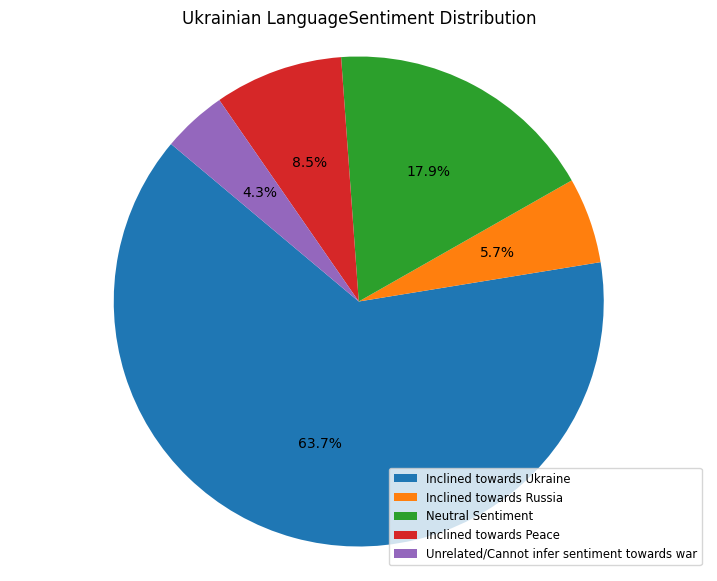

In [19]:
import matplotlib.pyplot as plt

# Define the sentiment categories and their corresponding percentages
sentiment_categories = [
    'Inclined towards Ukraine',
    'Inclined towards Russia',
    'Neutral Sentiment',
    'Inclined towards Peace',
    'Unrelated/Cannot infer sentiment towards war'
]

sentiment_percentages = [
    63.68,  # inclined towards ukraine
    5.66,  # inclined towards russia
    17.92,  # neutral sentiment
    8.49,  # inclined towards peace
    4.25   # unrelated/cannot infer sentiment towards war
]

# Create pie chart
plt.figure(figsize=(9, 7))
plt.pie(sentiment_percentages, autopct='%1.1f%%', startangle=140)
plt.title('Ukrainian LanguageSentiment Distribution')
plt.legend(sentiment_categories, loc='lower right', fontsize='small', bbox_to_anchor=(1.0, 0.0))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()


In [37]:
import pandas as pd
import re

def clean_sentiment(sentiment):
    # Remove numbering and convert to lowercase
    return re.sub(r'\d+[.)]\s*', '', sentiment).strip().lower()

def count_sentiment_categories(sentiments):
    # Initialize counters for sentiment categories
    category_counts = {
        'inclined towards peace': 0,
        'unrelated/cannot infer sentiment towards war': 0,
        'inclined towards ukraine': 0,
        'inclined towards russia': 0,
        'neutral sentiment': 0
    }
    
    # Count occurrences of each sentiment category
    for sentiment in sentiments:
        # Split the sentiment based on newline character
        categories = sentiment.split('\n')
        # Check if any category matches a category name
        for category in categories:
            if category.lower() in category_counts:
                category_counts[category.lower()] += 1
    
    return category_counts

def determine_majority_category(category_counts):
    # Determine majority category and handle ties
    max_count = max(category_counts.values())
    majority_categories = [category for category, count in category_counts.items() if count == max_count]
    
    if len(majority_categories) == 1:
        return majority_categories[0]
    #case2
    elif 'unrelated/cannot infer sentiment towards war' in majority_categories and 'neutral sentiment' in majority_categories:
        return 'neutral sentiment' 
    #case3
    elif 'unrelated/cannot infer sentiment towards war' in majority_categories and 'inclined towards ukraine' in majority_categories:
        return 'inclined towards ukraine'
    #case4
    elif 'unrelated/cannot infer sentiment towards war' in majority_categories and 'inclined towards russia' in majority_categories:
        return 'inclined towards russia'
    #case5
    elif 'unrelated/cannot infer sentiment towards war' in majority_categories and 'inclined towards peace' in majority_categories:
        return 'inclined towards peace'
    #case6
    elif 'inclined towards ukraine' in majority_categories and 'inclined towards russia' in majority_categories:
        return 'mixed sentiments'
    #case7
    elif 'inclined towards peace' in majority_categories and 'neutral sentiment' in majority_categories:
        return 'mixed sentiments'  
    #case8
    elif 'inclined towards peace' in majority_categories and 'inclined towards russia' in majority_categories:
        return 'mixed sentiments'  
    #case9
    elif 'inclined towards peace' in majority_categories and 'inclined towards ukraine' in majority_categories:
        return 'mixed sentiments'  
    else:
        return majority_categories[0]

# Load the data from CSV file
df = pd.read_csv('/Users/tahers/Documents/CN-TikTok/Georgia_Russia.csv')  # Replace with your actual file path

# Apply cleaning function to 'Sentiments' column
df['Sentiments'] = df['Sentiments'].apply(lambda x: clean_sentiment(x))

# Count sentiment categories and determine majority category
df['Category Counts'] = df['Sentiments'].str.split(',').apply(lambda x: count_sentiment_categories(x))
df['Majority Category'] = df['Category Counts'].apply(lambda x: determine_majority_category(x))

# Save the DataFrame to a new CSV file
df.to_csv('Georgia_Russia.csv', index=False)

In [38]:
import pandas as pd

# Load the data from CSV file
df = pd.read_csv('/Users/tahers/Documents/CN-TikTok/Georgia_Russia.csv')  # Replace with your actual file path

# Clean and lowercase the values in 'Description Sentiments' and 'Majority Category' columns
df['Description Sentiments'] = df['Description Sentiments'].apply(lambda x: str(x).lower().strip())
df['Majority Category'] = df['Majority Category'].apply(lambda x: str(x).lower().strip())

# Compare the values in 'Description Sentiments' and 'Majority Category' columns
df['Description_comment_match'] = df.apply(lambda row: 'matched' if row['Description Sentiments'] == row['Majority Category'] else 'unmatched', axis=1)

# Calculate the sums of matched and unmatched values
sum_matched = (df['Description_comment_match'] == 'matched').sum()
sum_unmatched = (df['Description_comment_match'] == 'unmatched').sum()

# Print the sums
print("Sum of matched values:", sum_matched)
print("Sum of unmatched values:", sum_unmatched)

# Save the DataFrame to a new CSV file
df.to_csv('Georgia_Russia.csv', index=False)

Sum of matched values: 30
Sum of unmatched values: 209


In [40]:
# import pandas as pd

# # Load the data from CSV file
# df = pd.read_csv('/Users/tahers/Documents/CN-TikTok/RQ3.csv')  # Replace with your actual file path

# # Clean and lowercase the values in 'Description Sentiments' and 'Majority Category' columns
# df['Description Sentiments'] = df['Description Sentiments'].apply(lambda x: str(x).lower().strip())
# df['Majority Category'] = df['Majority Category'].apply(lambda x: str(x).lower().strip())

# # Compare the values in 'Description Sentiments' and 'Majority Category' columns
# df['Description_comment_match'] = df.apply(lambda row: 'matched' if row['Description Sentiments'] == row['Majority Category'] else 'unmatched', axis=1)

# # Calculate the sums of matched and unmatched values
# sum_matched = (df['Description_comment_match'] == 'matched').sum()
# sum_unmatched = (df['Description_comment_match'] == 'unmatched').sum()

# # Print the sums
# print("Sum of matched values:", sum_matched)
# print("Sum of unmatched values:", sum_unmatched)

# # Save the DataFrame to a new CSV file
# df.to_csv('RQ3_with_updates.csv', index=False)

    # elif (row['Description Sentiments'] == 'inclined towards peace' or row['Description Sentiments'] == 'inclined towards ukraine' or row['Description Sentiments'] == 'inclined towards russia' or row['Description Sentiments'] == 'neutral sentiment' or row['Description Sentiments'] == 'unrelated/cannot infer sentiment towards war') and (row['Majority Category'] == 'inclined towards ukraine'or row['Majority Category'] == 'inclined towards russia' or row['Majority Category'] == 'inclined towards peace' or row['Majority Category'] == 'neutral sentiment' or row['Majority Category'] == 'unrelated/cannot infer sentiment towards war'):
    #     return 'Opposite Sentiments'
    # elif row['Description Sentiments'] == 'inclined towards peace' and row['Majority Category'] == 'inclined towards russia':
    #     return 'Opposite Sentiments (Peace/Russia)'
    # elif row['Majority Category'] == 'inclined towards peace' and row['Description Sentiments'] == 'inclined towards ukraine':
    #     return 'Opposite Sentiments (Ukraine/Peace)'
    # elif row['Majority Category'] == 'inclined towards peace' and row['Description Sentiments'] == 'inclined towards russia':
    #     return 'Opposite Sentiments (Russia/Peace)'
    # elif row['Description Sentiments'] == 'inclined towards russia' and row['Majority Category'] == 'neutral sentiment':
    #     return 'Opposite Sentiments (Russia/Neutral)'
    # elif row['Description Sentiments'] == 'inclined towards ukraine' and row['Majority Category'] == 'neutral sentiment':
    #     return 'Opposite Sentiments (Ukraine/Neutral)'
    # elif row['Description Sentiments'] == 'inclined towards peace' and row['Majority Category'] == 'neutral sentiment':
    #     return 'Opposite Sentiments (Peace/Neutral)'

import pandas as pd

def clean_sentiment(sentiment):
    # Remove numbering and convert to lowercase
    return re.sub(r'\d+[.)]\s*', '', sentiment).strip().lower()

# Load the data from CSV file
df = pd.read_csv('/Users/tahers/Documents/CN-TikTok/Georgia_Russia.csv')  # Replace with your actual file path

# Clean and lowercase the values in 'Description Sentiments' and 'Majority Category' columns
df['Description Sentiments'] = df['Description Sentiments'].apply(lambda x: clean_sentiment(x))
df['Majority Category'] = df['Majority Category'].apply(lambda x: clean_sentiment(x))

# Define function to update custom values based on conditions
def update_value(row):
    if row['Description Sentiments'] == row['Majority Category']:
        return f"Sentiment Matches: {row['Majority Category']}"
    elif row['Description Sentiments'] == 'inclined towards ukraine' and (row['Majority Category'] == 'inclined towards russia' or row['Majority Category'] == 'inclined towards ukraine'):
        return 'Opposite Sentiments (Ukraine/Russia)'
    # elif row['Description Sentiments'] == 'inclined towards russia' and row['Majority Category'] == 'inclined towards ukraine':
    #     return 'Opposite Sentiments (Russia/Ukraine)'
    elif row['Majority Category'] == 'mixed sentiments':
        return 'Mixed Sentiments'
    elif row['Description Sentiments'] == 'neutral sentiment' or row['Description Sentiments'] == 'Unrelated/Cannot infer sentiment towards war' or row['Description Sentiments'] == 'mixed sentiments':
        return row['Majority Category']
    else:
        return 'Opposite Sentiments'  # Default value if no condition matches

# Update values in 'Description_comment_match' column based on custom conditions
df['Video_Sentiments_Inferred'] = df.apply(update_value, axis=1)

# Calculate the sums of each custom value
matched_values = df['Video_Sentiments_Inferred'].apply(lambda x: x.startswith('Sentiment Matches:')).sum()
opposies = (df['Video_Sentiments_Inferred'] == 'Opposite Sentiments').sum()
mixed_sentiments = (df['Video_Sentiments_Inferred'] == 'Mixed Sentiments').sum()
Ukraine_Russia = (df['Video_Sentiments_Inferred'] == 'Opposite Sentiments (Ukraine/Russia)').sum()

# Print the sums
print("Sum of Matches:", matched_values)
print("Sum of Opposite Sentiments (Ukraine/Russia):", Ukraine_Russia)
print("Sum of Opposite Sentiments:", opposies)
print("Sum of Mixed Sentiments:", mixed_sentiments)

# Save the DataFrame to a new CSV file
df.to_csv('Georgia_Russia.csv', index=False)


(Description sentiment, Comment sentiment)
('inclined towards ukraine', 'inclined towards russia') -> Opp
('inclined towards ukraine', 'inclined towards peace') -> opp
('inclined towards ukraine', 'neutral sentiment') -> Opp
('inclined towards russia', 'inclined towards peace') -> opp
('inclined towards ukraine', 'unrelated/cannot infer sentiment towards war') - neglect
('inclined towards russia', 'neutral sentiment') -> neglect
('inclined towards russia', 'unrelated/cannot infer sentiment towards war') - neglect
('inclined towards peace', 'neutral sentiment') - neglect
('inclined towards peace', 'unrelated/cannot infer sentiment towards war') - neglect
('neutral sentiment', 'unrelated/cannot infer sentiment towards war') - neglect


Sum of Matches: 67
Sum of Opposite Sentiments (Ukraine/Russia): 24
Sum of Opposite Sentiments: 96
Sum of Mixed Sentiments: 20


In [7]:
import pandas as pd
import re

def clean_sentiment(sentiment):
    # Remove numbering and convert to lowercase
    return re.sub(r'\d+[.)]\s*', '', sentiment).strip().lower()

# Load the data from CSV file
df = pd.read_csv('/Users/tahers/Documents/CN-TikTok/RQ3_Test.csv')  # Replace with your actual file path

# Clean and lowercase the values in 'Description Sentiments' and 'Majority Category' columns
df['Description Sentiments'] = df['Description Sentiments'].apply(lambda x: clean_sentiment(x))
df['Majority Category'] = df['Majority Category'].apply(lambda x: clean_sentiment(x))

# Define function to update custom values based on conditions
def update_value(row):
    if row['Description Sentiments'] == row['Majority Category']:
        return "Sentiment Matched"
    
    elif row['Description Sentiments'] == 'inclined towards ukraine' and (row['Majority Category'] == 'inclined towards peace' or row['Majority Category'] == 'inclined towards russia' or row['Majority Category'] == 'neutral sentiment'):
        return 'Opposite Sentiments'

    elif row['Description Sentiments'] == 'inclined towards russia' and (row['Majority Category'] == 'inclined towards peace' or row['Majority Category'] == 'inclined towards ukraine' or row['Majority Category'] == 'neutral sentiment'):
        return 'Opposite Sentiments'
    
    elif row['Description Sentiments'] == 'inclined towards ukraine' and row['Majority Category'] == 'unrelated/cannot infer sentiment towards war' or row['Majority Category'] == 'neutral sentiment':
        return 'Neglect/Cannot Infer Anything useful'

    elif row['Description Sentiments'] == 'inclined towards russia' and row['Majority Category'] == 'unrelated/cannot infer sentiment towards war' or row['Majority Category'] == 'neutral sentiment':
        return 'Neglect/Cannot Infer Anything useful'
    
    elif row['Description Sentiments'] == 'inclined towards peace' and (row['Majority Category'] == 'unrelated/cannot infer sentiment towards war' or row['Majority Category'] == 'neutral sentiment'):
        return 'Neglect/Cannot Infer Anything useful'
    
    elif row['Description Sentiments'] == 'neutral sentiment' and row['Majority Category'] == 'unrelated/cannot infer sentiment towards war':
          return 'Neglect/Cannot Infer Anything useful'
    
    else:
        return 'Fix required'  # Default value if no condition matches

# Update values in 'Description_comment_match' column based on custom conditions
df['Video_Sentiments_Inferred'] = df.apply(update_value, axis=1)

# Calculate the sums of each custom value
matched_values = (df['Video_Sentiments_Inferred'] == 'Sentiment Matched').sum()
opposies = (df['Video_Sentiments_Inferred'] == 'Opposite Sentiments').sum()
neglectd_sentiments = (df['Video_Sentiments_Inferred'] == 'Neglect/Cannot Infer Anything useful').sum()
fix_req = (df['Video_Sentiments_Inferred'] == 'Fix required').sum()

# Print the sums
print("Sum of Sentiment Matched:", matched_values)
print("Sum of Opposite Sentiments:", opposies)
print("Sum of Neglected Sentiments:", neglectd_sentiments)
print("Sum of Fix krlo: ", fix_req)

# Save the DataFrame to a new CSV file
df.to_csv('RQ3_Data.csv', index=False)


Sum of Sentiment Matched: 173
Sum of Opposite Sentiments: 165
Sum of Neglected Sentiments: 29
Sum of Fix krlo:  144


In [2]:
import pandas as pd
import re

# Load the data from CSV file
df = pd.read_csv('/Users/tahers/Documents/CN-TikTok/RQ3_Data.csv')

hashtags = set(df['Hashtags'].str.lower())

# Print the unique hashtags
print("Unique Hashtags:")
print(len(hashtags))
for hashtag in hashtags:
    print(hashtag)

# # Initialize dictionary to store hashtag counts
# hashtag_counts = {}

# # Iterate through each row of the DataFrame
# for index, row in df.iterrows():
#     # Extract hashtags from the 'video_description' column using regular expression
#     hashtags = re.findall(r'#\w+', str(row['video_description']))
    
#     # Count occurrences of each hashtag
#     for hashtag in hashtags:
#         if hashtag in hashtag_counts:
#             hashtag_counts[hashtag] += 1
#         else:
#             hashtag_counts[hashtag] = 1

# # Sort the dictionary based on values in descending order
# sorted_hashtag_counts = dict(sorted(hashtag_counts.items(), key=lambda item: item[1], reverse=True))

# # Print the sorted dictionary
# for hashtag, count in sorted_hashtag_counts.items():
#     print(hashtag, ':', count)


Unique Hashtags:
87
#standwithukraineagainstwar
#უკრაინა
#russiaukrainewar
#ukrainerussiawar
#қазақстан және ресейукраина
#endrussianaggression
#ukraineresilience
#russsiaukraine
#uninterventionneededukraine
#freeukrainenow
#ukrainewarfront
#endtheukrainewar
#humanitariancrisisukraine
#ukrainewar
#refugeesfromukraine
#holdrussiaaccountable
#ukrainewarrussia
#2023_russia_ukraine_news
#kazakhstanwarperspective
#saveukraine
#protectciviliansukraine
#endtherussiaukrainewar
#ukrainecyberwar
#warcrimesinukraine
#stopwarinukraine
#standwithrussia
#რუსეთი უკრაინა საქართველო
#kazakhstanandukraine
#uniteforukraine
#russiaisaterroiststate
#ukrainerussiacrisis
#war
#russiaukrainearmy
#zelensky
#russianukrainianwar
#russiavsukraine
#kazakhstanandwarupdates
#russianinvasion
#stoprussia
#ресейукраинасоғысы
#უკრაინარუსეთი
#warzone
#endthebloodshedukraine
#russianwarcrimes
#ukrainewillwin
#stoprussiastopwar
#ukrainiansoldier
#ukrainerussia
#stopputin
#პუტინი#ზელენსკი
#russiaisaterroriststate
#noflyzone

In [45]:
import pandas as pd
import re

def filter_rows_by_hashtags(df, hashtags):
    # Initialize an empty list to store matching rows
    matched_rows = []
    
    # Iterate through each row of the DataFrame
    for index, row in df.iterrows():
        # Extract hashtags from the 'video_description' column using regular expression
        hashtags_in_description = re.findall(r'#\w+', str(row['video_description']))
        
        # Check if any of the specified hashtags are present in the 'video_description' column
        for hashtag in hashtags:
            if hashtag in hashtags_in_description:
                # Add the specific hashtag found in this row to the matched rows
                matched_row = row.copy()
                matched_row['repeated_hashtag'] = hashtag
                matched_rows.append(matched_row)
                break  # No need to continue searching for other hashtags in this row
    
    # Create a new DataFrame containing only the matched rows
    matched_df = pd.DataFrame(matched_rows)
    
    return matched_df

# Load the data from CSV file
df = pd.read_csv('/Users/tahers/Documents/CN-TikTok/Test_Final.csv')

# List of hashtags to search for
hashtags_to_search = ['#fyp', '#foryou', '#fypシ', '#foryoupage', '#viral', '#fypage']

# Filter rows based on hashtags
matched_df = filter_rows_by_hashtags(df, hashtags_to_search)

# Save the filtered DataFrame to a new CSV file
matched_df.to_csv('matched_rows.csv', index=False)


In [44]:
import pandas as pd
from collections import Counter

# Load the data from CSV file
df = pd.read_csv('/Users/tahers/Documents/CN-TikTok/Test_Final.csv')

# Clean and lowercase the usernames
df['username'] = df['username '].apply(lambda x: str(x).lower().strip().lstrip('@'))

# Create a list of all usernames
all_usernames = df['username'].tolist()

# Count the occurrences of each username
username_counts = Counter(all_usernames)

# Sort the dictionary based on values in descending order
sorted_username_counts = dict(sorted(username_counts.items(), key=lambda item: item[1], reverse=True))

# Print the sorted dictionary
for username, count in sorted_username_counts.items():
    print(username, ':', count)


philipdefranco : 8
prestonstew : 7
altinfo2 : 6
geo_tv_cool_moments : 6
cbsmornings : 5
flufynudel : 5
joeycontino2 : 4
sashareheylo : 4
vicenews : 4
60minutes : 3
bloombergoriginals : 3
abcnews : 3
peteralexievich : 3
manas_kaiyrtaiuly : 3
thesun : 3
petualang_z : 3
skynews : 3
user540290150247 : 3
factcheck.ge : 3
newswar : 3
rusrightwing : 3
metrouk : 2
militarycentralnews2 : 2
npr : 2
united24_media : 2
cbsnews : 2
cnn : 2
miltokcover : 2
botterylabs : 2
intel_drop : 2
gnooq1379 : 2
evo1963 : 2
cpscott15 : 2
yahoonews : 2
harryjsisson : 2
drjulia8 : 2
thenewsmovement : 2
valerisssh : 2
qazpolhis : 2
larysako : 2
itvnews : 2
teamgreen24 : 2
brianstandswithukraine : 2
nbcnews : 2
annayak24 : 2
news.melt : 2
eugeus : 2
tazomakharadze22 : 2
euronewsgeorgia : 2
giorgigiorgia1992 : 2
64.project : 2
georgiandance_officiall : 2
tvformula : 2
flyze_russia : 2
clipcar : 2
sovietzoca : 2
army_hkd : 1
rage_milit4ry : 1
you_better_then_them : 1
welcometoplanetokvibes : 1
bradshear : 1
cbsevenin

In [ ]:
import pandas as pd

# Load the data from CSV file
df = pd.read_csv('your_file.csv')  # Replace 'your_file.csv' with your actual file path

# Convert 'create_time' column to datetime format
df['create_time'] = pd.to_datetime(df['create_time'], infer_datetime_format=True, errors='coerce')

# Define the start and end dates of the range
start_date = pd.Timestamp('2022-02-24')
end_date = pd.Timestamp('2022-09-30')

# Filter rows within the specified date range
filtered_df = df[(df['create_time'] >= start_date) & (df['create_time'] <= end_date)]

# Save the filtered DataFrame to a new CSV file
filtered_df.to_csv('filtered_file.csv', index=False)  # Replace 'filtered_file.csv' with your desired file name


In [5]:
import pandas as pd

# Load the data from CSV file
df = pd.read_csv('/Users/tahers/Documents/CN-TikTok/RQ3_Data.csv')  

# Find the maximum values in each column
max_like_count = df['like_count'].max()
max_comment_count = df['comment_count'].max()
max_share_count = df['share_count'].max()

# Find the row where all three values are highest
highest_row = df[
    (df['like_count'] == max_like_count)
]

# Print the row where all three values are highest
print("Row with highest like_count, comment_count, and share_count:")
print(highest_row)


Row with highest like_count, comment_count, and share_count:
        Hashtags             Video ID create_time       username       region  \
84  #SaveUkraine  7306021844014927135  2023-11-26  @ralphchillin0  Kazakhstan   

                                    video_description like_count  \
84  #ukraine🇺🇦 Бог єдиний, хто може захистити вас ...      99600   

   comment_count  share_count view_count   \
84          3113         1133         NaN   

                                             Comments  \
84  1. God bless Ukrainian 2.  Always nice to see ...   

                                           Sentiments  \
84  1) Inclined towards Ukraine\n2) Neutral Sentim...   

   Majority Category         Other Languages than English  \
84  inclined towards ukraine                          NaN   

   Sentiment of other Language    Description Sentiments  \
84                         NaN  inclined towards ukraine   

   Description_comment_match Video_Sentiments_Inferred  
84               